# **Kegiatan Modul 3**

**Poin penilaian :**

* Tingkat kesesuaian code
* Tingkat kesesuaian output
* Kesesuaian step preprocessing dan pemodelan
* Kesesuaian jawaban dengan konten materi modul
* Pemahaman materi tentang Dropout dan BatchNormalization
* Dapat menerapkan semua konten materi dalam modul-modul sebelumnya
* Kerapian kode program
* Tidak ada error
* Nilai Maksimal 100 poin

## **Introduction**

Dataset yang akan anda gunakan dalam kegiatan ini adalah dataset [Rock Paper Scissors](https://www.kaggle.com/drgfreeman/rockpaperscissors).  Demi mempermudah anda dalam mengerjakan modul ini maka akan sangat disarankan untuk menggunakan [google colab](https://colab.research.google.com/). Anda dapat menggunakan google colab untuk mendownload langsung dataset dari kaggle dan menyimpannya dalam google drive anda. Untuk kenyamanan dan ruang kerja yang besar akan lebih baik anda menggunakan email kampus untuk menyimpan dataset yang anda gunakan. Perhatikan langkah berikut untuk melakukan setting environment anda.

## **Get Your Dataset**

* Mount drive terlebih dahulu

* Untuk dapat mengakses dataset ini anda diharuskan memiliki akun kaggle. Jika belum memilikinya buat satu akun pribadi.

* Download kaggle API.json kemudian upload dalam google drive anda.

* Ubah lokasi direktori kerja anda ke direktori dimana anda menyimpan kaggle.json

* Buka laman dataset kemudian Copy API Command.

* Jalankan perintah untuk mendownload dataset dari kaggle menggunakan google colab.

* Untuk selanjutnya pahami code dibawah dengan baik.

* Gunakan tutorial berikut untuk lebih jelasnya : [Fetch Kaggle Dataset into Google Colab](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define kaggle json path
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Colab Notebooks/kaggle"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/Colab Notebooks/modul3

/content/drive/My Drive/Colab Notebooks/modul3


Cek apakah api sudah terbaca oleh sistem

In [ ]:
# Cek apakah api sudah terbaca oleh sistem
!ls  

model.h5  rockpaperscissors  rps-cv-images  test  train  val


* Paste API Command dari kaggle dataset yang telah anda copy sebelumnya dan tambahkan tanda seru didepannya.
* Pastikan anda menggunakan akun google kampus untuk mendapatkan storage penyimpanan unlimited.
* Lebih disarankan untuk menggunakan google colab karena proses download data lebih cepat dan stabil daripada download manual dan menggunakan jupyter notebook.

In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

  1% 4.00M/306M [00:00<00:50, 6.29MB/s]
User cancelled operation


In [ ]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

model.h5	   rockpaperscissors.zip  test	 val
rockpaperscissors  rps-cv-images	  train


In [ ]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
# Cek isi direktori kerja untuk memastikan dataset telah berhasil diekstrak.
!ls

model.h5	   rockpaperscissors.zip  test	 val
rockpaperscissors  rps-cv-images	  train


## **Prepare Your Data**

### **Soal 1** 
poin 5

---
Terlihat disana bahwa ada file dan folder baru yaitu : `paper, rock, scissors, README_rpc-cv-images.txt`. Untuk tujuan mempermudah aksesabilitas dataset maka akan lebih baik semua folder dataset yang merepresentasikan kelasnya tersebut disimpan dalam satu folder bernama `dataset`. Tugas anda adalah membuat folder baru dan memindahkan semua folder tersebut folder `dataset`.

Selanjutnya, anda akan ditugaskan untuk melakukan splitting dataset menjadi 3 bagian yaitu `train, test, val` oleh sebab itu anda perlu tempat khusus untuk menyimpan ketiga folder tersebut agar penyimpanan anda lebih rapi. Buatlah sebuah folder baru bernama `rockpaperscissors` dan masukkan folder `dataset` kedalamnya. Nanti kita juga akan menyimpan folder `train, test, val` kedalam folder `rockpaperscissors`.

*Ingat google colab juga menerima command berbasis linux.*

In [ ]:
# TULIS CODE ANDA DISINI
%mkdir -p rockpaperscissors/dataset
%ls
print(".......")
%ls rockpaperscissors/

rockpaperscissors/  rps-cv-images/
.......
dataset/  test/  train/  val/


In [ ]:
# TULIS CODE ANDA DISINI
%mv -t rockpaperscissors/dataset paper rock scissors

mv: cannot stat 'paper': No such file or directory
mv: cannot stat 'rock': No such file or directory
mv: cannot stat 'scissors': No such file or directory
paper/  README_rpc-cv-images.txt  rock/  scissors/


In [ ]:
%ls
print("...")
%ls rockpaperscissors
print("...")
%ls rockpaperscissors/dataset

model.h5  rockpaperscissors/  rps-cv-images/
...
dataset/  test/  train/  val/
...
paper/  rock/  scissors/


Bila anda melakukannya dengan benar, maka ketika anda menjalankan perintah dibawah anda akan menemui output sbb :

**Output perintah `!ls`**
```
 bbc_document_classification	  kaggle.json
 big_mart_sales_forcasting	  model.png
 Bird_Type			  monkey_labels.txt
 BRAIN_TUMOR			  Monkey_Species
 cats_and_dogs_filtered		  PetImages
 dataset			  README_rpc-cv-images.txt
 Diabetics_Retinopathy		  Rice_Disease
 DS_CHEAT_SHEET			  rockpaperscissors
 imdb_indonesian_movies_2.csv	  rps-cv-images
'Kaggle Download Dataset.ipynb'
```

**Output perintah `!ls rockpaperscissors`**
```
 dataset
```
**Output perintah `!ls rockpaperscissors`**
```
 paper  rock  scissors
```



### **Soal 2**  *Opsional*

poin 15

---
Sebelum dataset siap untuk dilakukan proses training anda perlu melakukan splitting dataset menjadi 3 bagian yaitu `train, test, val`. Data `train dan val` akan digunakan ketika anda melakukan training model. Dan data `test` akan anda gunakan ketika anda melakukan prediksi unseen data menggunakan model yang telah anda latih.

* nilai full hanya untuk praktikan yang mampu menerapkan 2 baris code untuk splitting dataset

In [ ]:
# TULIS CODE ANDA DISINI
!pip install split-folders

In [ ]:
%cd rockpaperscissors/

/content/drive/My Drive/Colab Notebooks/modul3/rockpaperscissors


In [ ]:
!rm -rf test train val

In [ ]:
import splitfolders
splitfolders.ratio('dataset', output='../', seed=1337, ratio=(.79, .20, .01)) 


Copying files: 296 files [03:11,  1.52 files/s]
Copying files: 297 files [03:12,  1.46 files/s]
Copying files: 298 files [03:13,  1.43 files/s]
Copying files: 299 files [03:14,  1.38 files/s]
Copying files: 300 files [03:14,  1.42 files/s]
Copying files: 301 files [03:15,  1.39 files/s]
Copying files: 302 files [03:16,  1.44 files/s]
Copying files: 303 files [03:17,  1.40 files/s]
Copying files: 304 files [03:17,  1.42 files/s]
Copying files: 305 files [03:18,  1.44 files/s]
Copying files: 306 files [03:18,  1.58 files/s]
Copying files: 307 files [03:19,  1.62 files/s]
Copying files: 308 files [03:20,  1.57 files/s]
Copying files: 309 files [03:20,  1.58 files/s]
Copying files: 310 files [03:21,  1.55 files/s]
Copying files: 311 files [03:22,  1.40 files/s]
Copying files: 312 files [03:22,  1.55 files/s]
Copying files: 313 files [03:23,  1.64 files/s]
Copying files: 314 files [03:23,  1.61 files/s]
Copying files: 315 files [03:24,  1.56 files/s]
Copying files: 316 files [03:25,  1.55 

In [ ]:
!ls

model.h5	   rockpaperscissors.zip  test	 val
rockpaperscissors  rps-cv-images	  train


In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/modul3


Splitting dataset berhasil apabila dijalankan perintah `ls rockpaperscissors` maka akan menampilkan output seperti dibawah ini:

```
# dataset/  test/  train/  val/
```



## **Data Preprocessing**

Kita anggap dataset yang kita miliki merupakan dataset yang telah bersih dan siap digunakan untuk proses training model. Namun agar data yang kita miliki dapat diproses oleh model maka kita perlu melakukan sedikit pengolahan data. Kita perlu melakukan load dataset yang tersimpan dalam folder-folder kelas menggunakan generator dan melakukan sedikit proses augmentasi sederhana. 


**NOTE :** Penjelasan augmentasi secara detail akan dibahas pada modul selanjutnya. Disini kita akan mengunakan augmentasi sederhana saja seperti resize, flip dan rotation.

### **Soal 3**
poin 20

---

Lakukan proses agumentasi sederhana dan setting dataset menggunakan generator dengan ketentuan **WAJIB** menyertakan proses berikut :

* Resize
* Rescaling
* Color Mode
* Shuffle
* Class Mode

Terapkan semua proses diatas pada data `train, test dan validation`.


In [ ]:
# Definisikan path untuk data train test dan validation
# sesuaikan dengan path anda
train_path = "train"
test_path  = "test"
val_path   = "val"

In [ ]:
# TULIS KODE ANDA DISINI
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    color_mode="rgb",
                                                    shuffle="false")

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  color_mode="rgb",
                                                  shuffle="false")

val_generator = val_datagen.flow_from_directory(val_path,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical',
                                                color_mode="rgb",
                                                shuffle="false")

Found 1727 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


## **Definisikan Model CNN**

Sangat disarankan menggunakan GPU sebagai akselerator untuk mempercepat proses training. Oleh sebab itu akan sangat lebih baik bila menggunakan google colab dimana anda dapat meminjam GPU dari google secara gratis.

### **Soal 4**
poin 60

---

Definisikan model CNN anda sebaik mungkin, model dan evaluasi yang anda bangun **WAJIB** memenuhi kriteria berikut:

* Menerapkan proses Convolution 
* Menerapkan proses Pooling
* Menerapkan Dropout
* Menerpakan BatchNormalization
* Evaluasi model menggunakan grafik loss dan accuracy
* Evaluasi menggunakan classification report
* Evaluasi menggunakan confusion matrix

Bila anda telah melaksanakan semua item-item wajib diatas maka anda bisa mendapatkan penilaian yang sesuai dengan kriteria penilaian sbb: ***Bila tidak menerapkan salah satu dari item wajib maka penilaian di soal ini dianggap gugur***

* Akurasi < 50% Nilai Max 20
* Akurasi < 80% Nilai Max 30
* Akurasi >= 80% Nilai Max 40

Opsional untuk mendapatkan nilai tambah :
* Menggunakan Callbacks  **Poin tambahan 5 poin**
* Menggunakan Learning Rate  **Poin tambahan 5 poin**
* Lakukan prediksi dengan data test, pastikan model anda dapat memprediksi unseen data dengan kelas yang benar ***dengan ketentuan dapat menampilkan gambar dan label prediksi dan probability score dari gambar yang diprediksikan***. **Poin tambahan 15 poin**
* **Nilai tambahan 15 poin** apabila lama proses training model tidak lebih dari 15 menit dengan akurasi >90%

In [ ]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras import models
from keras.models import Sequential
from keras import layers
from keras.layers import InputLayer
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
import matplotlib.pyplot as plt

import time

In [ ]:
# DEFINISIKAN MODEL ANDA DISINI
# Feature Extraction Layer
model = models.Sequential()
model.add(InputLayer(input_shape=[150,150,3]))

model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

keras.layers.Dropout(rate=0.2)

model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

keras.layers.Dropout(rate=0.5)

model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

model.add(BatchNormalization())

model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 75, 75, 32)        896       
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 19, 19, 32)        9248      
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 5, 5, 32)          9248      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 2, 2, 32)        

In [ ]:
# TULIS CODE CALLBACKS ANDA DISINI
# filepath = path
# tf.keras.callbacks.ModelCheckpoint(filepath, 
#                                      monitor='val_accuracy', 
#                                      verbose=0, 
#                                      save_best_only=True,
#                                      save_weights_only=False, 
#                                      mode='auto', 
#                                      save_freq='epoch')

In [ ]:
# TULIS CODE UNTUK DEFINISI LEARNING RATE DISINI 
model.compile(optimizer=Adam(lr=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# TULIS CODE UNTUK TRAINING DISINI
epoch = 50
start = time.time()
H = model.fit_generator(train_generator, steps_per_epoch=32, validation_data=val_generator, epochs=epoch, verbose=1)
stop = time.time()
print(f"Training time: {stop - start}s")
model.save("model.h5")

Epoch 1/50
32/32 [==============================] - 6s 183ms/step - loss: 1.0986 - accuracy: 0.3135 - val_loss: 1.0986 - val_accuracy: 0.3432
Epoch 2/50
32/32 [==============================] - 6s 173ms/step - loss: 1.0982 - accuracy: 0.3672 - val_loss: 1.0985 - val_accuracy: 0.3432
Epoch 3/50
32/32 [==============================] - 5s 171ms/step - loss: 1.0936 - accuracy: 0.4951 - val_loss: 1.0976 - val_accuracy: 0.3432
Epoch 4/50
32/32 [==============================] - 6s 173ms/step - loss: 1.0619 - accuracy: 0.6465 - val_loss: 1.0906 - val_accuracy: 0.3432
Epoch 5/50
32/32 [==============================] - 6s 188ms/step - loss: 0.9089 - accuracy: 0.6475 - val_loss: 1.0509 - val_accuracy: 0.3524
Epoch 6/50
32/32 [==============================] - 6s 174ms/step - loss: 0.6332 - accuracy: 0.6804 - val_loss: 0.9750 - val_accuracy: 0.5538
Epoch 7/50
32/32 [==============================] - 6s 174ms/step - loss: 0.5513 - accuracy: 0.6764 - val_loss: 0.9235 - val_accuracy: 0.6018
Epoch 

In [ ]:
# TULIS CODE UNTUK MENCETAK LAMA TRAINING TIME DISINI


# **Evaluate**

In [ ]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENGEVALUASI MODEL DISINI
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
from keras.preprocessing import image

In [ ]:
# TULIS CODE UNTUK EVALUASI MODEL DISINI
test_score = model.evaluate_generator(test_generator, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

[INFO] accuracy: 87.50%
[INFO] Loss:  0.39547133445739746


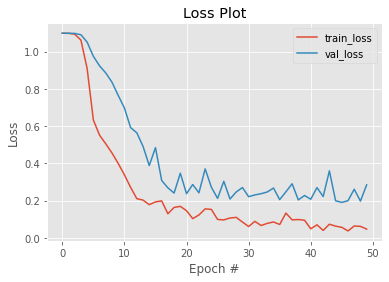

In [ ]:
# TULIS CODE UNTUK PLOT EVALUASI MODEL DISINI
plt.style.use("ggplot")
plt.figure()
#plt.axis(0,25,0,8)
plt.plot(np.arange(0, epoch), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epoch), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

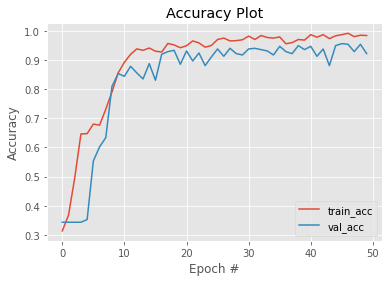

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epoch), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# # TULIS CODE UNTUK PREDIKSI DATA TEST DISINI
# model = load_model('model.h5')

# # pred=model.predict_generator(
# #     test_generator, steps=None, callbacks=None, max_queue_size=10, workers=1,
# #     use_multiprocessing=False, verbose=0
# # )

# # predicted_class_indices=np.argmax(pred,axis=1)

# labels = (train_generator.class_indices)
# print(labels)
# # labels = dict((v,k) for k,v in labels.items())
# # predictions = [labels[k] for k in predicted_class_indices]

# # filenames=test_generator.filenames
# # results=pd.DataFrame({"Filename":filenames,"Predictions":predictions})

# gambar = cv2.imread('/content/drive/MyDrive/Colab Notebooks/modul3/test/rock/ReFXAsLF8NkgNAL4.png')
# dst = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

# img = dst
# img = cv2.resize(img,(150,150))
# img = np.reshape(img,[1,150,150,3])

# classes = model.predict(img)

# print(classes)

# plt.imshow(dst)


<!-- 
 -->

In [ ]:
fig, ax = plt.subplots(5, 5, figsize = (35, 35))
for f in range(0,24):
  fl = 'test/'+test_generator.filenames[f]
  img = image.load_img(fl, target_size=(150,150,3))
  img = image.img_to_array(img)
  img = img/255

  classes = list(test_generator.class_indices.keys())
  proba = model.predict(img.reshape(1,150,150,3))
  top_3 = np.argsort(proba[0])
  for i in range(3):
      ax[f//5, f%5].imshow(img)
      ax[f//5, f%5].axis('off')
      ax[f//5, f%5].set_title(test_generator.filenames[f].split('/')[1]+\
                              "\nPred : {}".format(classes[top_3[i]])+\
                              " | Acc : {:.4}".format(proba[0][top_3[i]]),
                              fontsize=20)

Output hidden; open in https://colab.research.google.com to view.